# Tarefa 2 - Combinação de modelos II

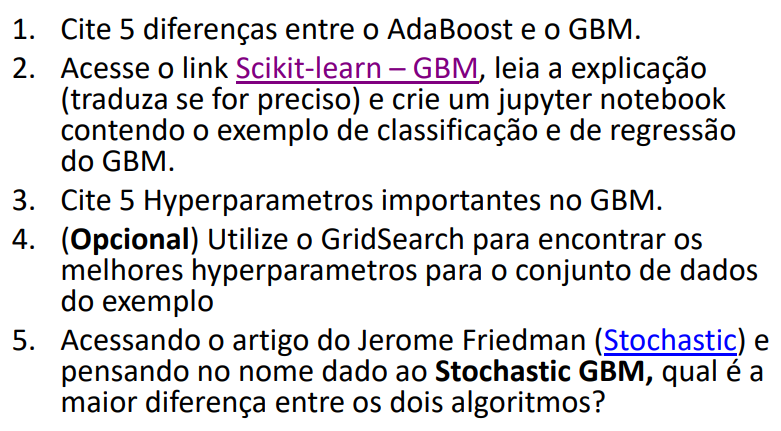

- **Link:** [Scikit-learn – GBM](https://scikit-learn.org/stable/modules/ensemble.html)
-  **Artigo de Jerome Friedman:** [Stochastic](https://jerryfriedman.su.domains/ftp/stobst.pdf)

**5 diferenças entre o AdaBoost e o GBM**

1. No AdaBoost temos um floresta de stumps, no GBM temos uma floresta de ávores.
2. No AdaBoost começamos criando um stump, no GBM o pimeiro passo é a média do `y`.
3. No AdaBoost cada resposta advinda dos stumps tem um peso diferente, no GBM todas as respostas das árvores possui um multiplicador em comum chamado `learning_rate` (eta).
4. No AdaBoost os pesos dos exemplos de treinamento são ajustados a cada iteração, no GBM os resíduos dos modelos anteriores são ajustados.
5. No AdaBoost existe a otimização da função de perda exponencial, e o GBM permite a otimização de várias funções de perda.

**Código com os 5 hyperparâmetros**

In [6]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = HistGradientBoostingClassifier(max_iter=100,
                                     min_samples_leaf=1,
                                     max_depth=2,
                                     learning_rate=1,
                                     max_leaf_nodes=31).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9117

In [7]:
param_grid = {
    'max_iter': [100, 200],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_leaf_nodes': [31, 50, 100]}

grid_search = GridSearchCV(estimator = clf,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)
    
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Acurácia no conjunto de teste:", test_score)

Melhores hiperparâmetros encontrados: {'learning_rate': 1.0, 'max_depth': 2, 'max_iter': 200, 'max_leaf_nodes': 31, 'min_samples_leaf': 4}
Acurácia no conjunto de teste: 0.9178


**Diferença entre os algorítimos**

É a forma como o erro é tratado e corrigido durante o processo de treinamento. Enquanto o AdaBoost ajusta os pesos dos exemplos de treinamento com base em sua classificação pelos modelos anteriores, o GBM ajusta diretamente os resíduos ou erros dos modelos anteriores.